In [1]:
# Imported Libraries 
import pandas as pd 
import urllib
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline

# ----- make nice figures -----
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150
from cycler import cycler
COLORS = ['#F00D2C', '#242482', '#0071BE', '#4E8F00', '#553C67', '#DA5319', '#242482']
default_cycler = cycler(color= 'r''b')
plt.rc('axes', prop_cycle=default_cycler) 
# -----------------------------

In [2]:
# HTTP request for data 1

df = pd.read_csv('silicon_fits_3.csv',)


# Indexing, Columns and Data Values

In [3]:
index = df.index
columns = df.columns
values = df.values

print(columns)
print(index)
type(values)
#Index(['state', 'color', 'food', 'age', 'height', 'score'], 
      #dtype='object')

Index(['Time (s)', 'shape 1', 'pos 1', 'width 1', 'ampl 1', 'shape 2', 'pos 2',
       'width 2', 'ampl 2', 'shape 3', 'pos 3', 'width 3', 'ampl 3', 'shape 4',
       'pos 4', 'width 4', 'ampl 4', 'shape 5', 'pos 5', 'width 5', 'ampl 5',
       'shape 6', 'pos 6', 'width 6', 'ampl 6', 'shape 7', 'pos 7', 'width 7',
       'ampl 7', 'shape 8', 'pos 8', 'width 8', 'ampl 8'],
      dtype='object')
RangeIndex(start=0, stop=108, step=1)


numpy.ndarray

In [4]:
pd.set_option('Display.max_columns', None)
pd.set_option('Display.max_rows', None)

In [5]:
df.head(108)

,Time (s),shape 1,pos 1,width 1,ampl 1,shape 2,pos 2,width 2,ampl 2,shape 3,pos 3,width 3,ampl 3,shape 4,pos 4,width 4,ampl 4,shape 5,pos 5,width 5,ampl 5,shape 6,pos 6,width 6,ampl 6,shape 7,pos 7,width 7,ampl 7,shape 8,pos 8,width 8,ampl 8
0,0,lorentz,495,20,0.000000,lorentz,497.5,20,0.000000,NaN,500,NaN,0.000000,NaN,502.5,NaN,0.000000,NaN,517.5,NaN,700.261137,NaN,520,NaN,176.967909,NaN,522.5,NaN,0.000000,NaN,525,NaN,0.000000
1,3,lorentz,495,20,0.000000,lorentz,497.5,20,0.000000,NaN,500,NaN,0.000000,NaN,502.5,NaN,0.000000,NaN,517.5,NaN,642.006188,NaN,520,NaN,222.041040,NaN,522.5,NaN,0.000000,NaN,525,NaN,0.000000
2,6,lorentz,495,20,0.000000,lorentz,497.5,20,0.000000,NaN,500,NaN,0.000000,NaN,502.5,NaN,0.000000,NaN,517.5,NaN,596.459811,NaN,520,NaN,269.051036,NaN,522.5,NaN,0.000000,NaN,525,NaN,0.000000
3,9,lorentz,495,20,334.896749,lorentz,497.5,20,949.711285,lorentz,500,20.0,563.872491,lorentz,502.5,20.0,0.000000,lorentz,517.5,20.0,0.000000,lorentz,520,20.0,307.838047,NaN,522.5,NaN,281.424106,NaN,525,NaN,165.738202
4,13,lorentz,495,20,375.536625,lorentz,497.5,20,822.458136,lorentz,500,20.0,848.291680,lorentz,502.5,20.0,0.000000,lorentz,517.5,20.0,0.000000,lorentz,520,20.0,239.686423,NaN,522.5,NaN,403.133902,NaN,525,NaN,102.469775
5,16,lorentz,495,20,276.641676,lorentz,497.5,20,765.363320,lorentz,500,20.0,983.847068,lorentz,502.5,20.0,180.816743,lorentz,517.5,20.0,0.000000,lorentz,520,20.0,0.000000,NaN,522.5,NaN,196.595369,NaN,525,NaN,418.748374
6,19,lorentz,495,20,603.972099,lorentz,497.5,20,777.886182,lorentz,500,20.0,699.122134,lorentz,502.5,20.0,0.000000,lorentz,517.5,20.0,0.000000,lorentz,520,20.0,265.127921,NaN,522.5,NaN,337.959346,NaN,525,NaN,158.595541
7,23,lorentz,495,20,477.184091,lorentz,497.5,20,940.038947,lorentz,500,20.0,716.926398,lorentz,502.5,20.0,0.000000,lorentz,517.5,20.0,0.000000,NaN,520,NaN,0.000000,NaN,522.5,NaN,0.000000,NaN,525,NaN,344.658562
8,26,lorentz,495,20,601.800816,lorentz,497.5,20,885.252701,lorentz,500,20.0,584.324468,lorentz,502.5,20.0,0.000000,lorentz,517.5,20.0,0.000000,lorentz,520,20.0,98.440619,NaN,522.5,NaN,362.574494,NaN,525,NaN,289.583386
9,29,lorentz,495,20,477.119901,lorentz,497.5,20,840.986938,lorentz,500,20.0,795.225667,lorentz,502.5,20.0,0.000000,lorentz,517.5,20.0,0.000000,lorentz,520,20.0,101.678222,NaN,522.5,NaN,283.761012,NaN,525,NaN,336.910488


In [6]:
df[['pos 1', 'ampl 8']]

,pos 1,ampl 8
0,495,0.000000
1,495,0.000000
2,495,0.000000
3,495,165.738202
4,495,102.469775
5,495,418.748374
6,495,158.595541
7,495,344.658562
8,495,289.583386
9,495,336.910488


In [7]:
df.loc[df['ampl 1'].idxmax()]

Time (s)        287
shape 1     lorentz
pos 1           495
width 1          20
ampl 1      923.225
shape 2     lorentz
pos 2         497.5
width 2          20
ampl 2      499.979
shape 3     lorentz
pos 3           500
width 3          20
ampl 3      291.737
shape 4     lorentz
pos 4         502.5
width 4          20
ampl 4      246.841
shape 5     lorentz
pos 5         517.5
width 5          20
ampl 5            0
shape 6     lorentz
pos 6           520
width 6          20
ampl 6      109.512
shape 7     lorentz
pos 7         522.5
width 7          20
ampl 7      291.865
shape 8         NaN
pos 8           525
width 8         NaN
ampl 8      406.473
Name: 87, dtype: object

# All Column Averages

In [8]:

df.shape
df.mean(axis = 0)


Time (s)    176.287037
pos 1       495.000000
width 1      20.000000
ampl 1      645.625870
pos 2       497.500000
width 2      20.000000
ampl 2      655.948903
pos 3       500.000000
width 3      20.000000
ampl 3      553.186544
pos 4       502.500000
width 4      20.000000
ampl 4       70.998064
pos 5       517.500000
width 5      20.000000
ampl 5       22.411531
pos 6       520.000000
width 6      20.000000
ampl 6      160.595825
pos 7       522.500000
width 7      20.000000
ampl 7      274.536165
pos 8       525.000000
width 8      20.000000
ampl 8      344.759608
dtype: float64

## Hyper Parameter Calculations for Positions

In [9]:
Time = np.array(index)

Initial guess has to be checked on - sigma_0

# Partial Parallel - Optimizer on

In [11]:
#Kernel 1 - P1

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model 1

#Sigma_n = Covariance matrix
sigma_0 = 1   #Initial uncertainty 
sigma_W = .1 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernelZ = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,10))
model1 = GaussianProcessRegressor(kernel = kernelZ, alpha = (sigma_W**2), normalize_y = True)



model1.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 1']])

#For optomization
print(model1.kernel_)

0.00316**2 * RBF(length_scale=10)


In [12]:
# Kernel 1 - P2

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model 1

#Sigma_n = Covariance matrix
sigma_0 = 1   #Initial uncertainty 
sigma_W = .1 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernelY = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,10))
model2 = GaussianProcessRegressor(kernel = kernelY, alpha = (sigma_W**2), normalize_y = True)




model2.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 2']])

           #For optomization
print(model2.kernel_)

0.00316**2 * RBF(length_scale=10)


In [13]:
# Kernel 1 - P3

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model 1

#Sigma_n = Covariance matrix
sigma_0 = 1   #Initial uncertainty 
sigma_W = .1 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernelX = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,10))
model3 = GaussianProcessRegressor(kernel = kernelX, alpha = (sigma_W**2), normalize_y = True)




model3.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 3']])

           #For optomization
print(model3.kernel_)


0.00316**2 * RBF(length_scale=10)


In [14]:
# Kernel 1 - P4

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model 1

#Sigma_n = Covariance matrix
sigma_0 = 1   #Initial uncertainty 
sigma_W = .1 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernelW = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,10))
model4 = GaussianProcessRegressor(kernel = kernelW, alpha = (sigma_W**2), normalize_y = True)




model4.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 4']])

           #For optomization
print(model4.kernel_)


0.00316**2 * RBF(length_scale=10)


In [15]:
# Kernel 1 - P5

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model 1

#Sigma_n = Covariance matrix
sigma_0 = 1   #Initial uncertainty 
sigma_W = .1 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernelU = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,10))
model5 = GaussianProcessRegressor(kernel = kernelU, alpha = (sigma_W**2), normalize_y = True)




model5.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 5']])

           #For optomization
print(model5.kernel_)


0.00316**2 * RBF(length_scale=10)


In [16]:
# Kernel 1 - P6

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model 1

#Sigma_n = Covariance matrix
sigma_0 = 1   #Initial uncertainty 
sigma_W = .1 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernelT = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,10))
model6 = GaussianProcessRegressor(kernel = kernelT, alpha = (sigma_W**2), normalize_y = True)




model6.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 6']])

           #For optomization
print(model6.kernel_)


0.00316**2 * RBF(length_scale=10)


In [18]:
# Kernel 1 - P7

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model 1

#Sigma_n = Covariance matrix
sigma_0 = 1   #Initial uncertainty 
sigma_W = .1 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernelV = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,10))
model7 = GaussianProcessRegressor(kernel = kernelV, alpha = (sigma_W**2), normalize_y = True)




model7.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 7']])

           #For optomization
print(model7.kernel_)


0.00316**2 * RBF(length_scale=10)


In [19]:
# Kernel 1 - P8

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model 1

#Sigma_n = Covariance matrix
sigma_0 = 1   #Initial uncertainty 
sigma_W = .1 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernelS = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,10))
model8 = GaussianProcessRegressor(kernel = kernelS, alpha = (sigma_W**2), normalize_y = True)




model8.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 8']])

           #For optomization
print(model8.kernel_)


0.00316**2 * RBF(length_scale=10)


# Average of all hyper parameters for Position using their specific column defined Guesses

In [20]:
print(model1.kernel_)
print(model2.kernel_)
print(model3.kernel_)
print(model4.kernel_)
print(model5.kernel_)
print(model6.kernel_)
print(model7.kernel_)
print(model8.kernel_)

0.00316**2 * RBF(length_scale=10)
0.00316**2 * RBF(length_scale=10)
0.00316**2 * RBF(length_scale=10)
0.00316**2 * RBF(length_scale=10)
0.00316**2 * RBF(length_scale=10)
0.00316**2 * RBF(length_scale=10)
0.00316**2 * RBF(length_scale=10)
0.00316**2 * RBF(length_scale=10)


In [21]:
Uncertainties = (.00316,.00316,.00316,.00316,.00316,1.54,.00316,0.00316)
Length = (10,10,10,10,10,10,10,10)

print(np.mean(Uncertainties))
print(np.mean(Length))

0.19526500000000002
10.0


## Partial Parallel GP fitting 50% of Data - Common Kernel

In [22]:
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Averaged position hyper parameters with optimizer

#Sigma_n = Covariance matrix
sigma_0 = .195265   #Initial uncertainty 
sigma_W = .019 #Initial noise variance 
length_scale = 10.0 #Initial length scale guess
f_0 = 0 # inital mean


kernelPP = sigma_0**1.25*RBF(length_scale, length_scale_bounds = (10.0, 10))

model1 = GaussianProcessRegressor(kernel = kernelPP, alpha = sigma_W**2, normalize_y = True, optimizer = None)
model2 = GaussianProcessRegressor(kernel = kernelPP, alpha = sigma_W**2, normalize_y = True, optimizer = None)
model3 = GaussianProcessRegressor(kernel = kernelPP, alpha = sigma_W**2, normalize_y = True, optimizer = None)
model4 = GaussianProcessRegressor(kernel = kernelPP, alpha = sigma_W**2, normalize_y = True, optimizer = None)
model5 = GaussianProcessRegressor(kernel = kernelPP, alpha = sigma_W**2, normalize_y = True, optimizer = None)
model6 = GaussianProcessRegressor(kernel = kernelPP, alpha = sigma_W**2, normalize_y = True, optimizer = None)
model7 = GaussianProcessRegressor(kernel = kernelPP, alpha = sigma_W**2, normalize_y = True, optimizer = None)
model8 = GaussianProcessRegressor(kernel = kernelPP, alpha = sigma_W**2, normalize_y = True, optimizer = None)



model1.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 1']])
model2.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 2']])
model3.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 3']])
model4.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 4']])
model5.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 5']])
model6.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 6']])
model7.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 7']])
model8.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 8']])

# Predictions at time step 300 - 

prediction_P = np.zeros(8)

prediction_P[0] = model1.predict([[300]])
prediction_P[1] = model2.predict([[300]])
prediction_P[2] = model3.predict([[300]])
prediction_P[3] = model4.predict([[300]])
prediction_P[4] = model5.predict([[300]])
prediction_P[5] = model6.predict([[300]])
prediction_P[6] = model7.predict([[300]])
prediction_P[7] = model8.predict([[300]])


Data = np.zeros(8)

print(prediction_P)

           #For optomization
#print(modelY.kernel_)

[495.  497.5 500.  502.5 517.5 520.  522.5 525. ]


In [23]:
# Actual Data at time step 300 seconds
df.loc[91]

Time (s)        300
shape 1     lorentz
pos 1           495
width 1          20
ampl 1       826.93
shape 2     lorentz
pos 2         497.5
width 2          20
ampl 2      405.894
shape 3     lorentz
pos 3           500
width 3          20
ampl 3      650.833
shape 4     lorentz
pos 4         502.5
width 4          20
ampl 4            0
shape 5     lorentz
pos 5         517.5
width 5          20
ampl 5            0
shape 6     lorentz
pos 6           520
width 6          20
ampl 6      322.417
shape 7         NaN
pos 7         522.5
width 7         NaN
ampl 7      288.323
shape 8         NaN
pos 8           525
width 8         NaN
ampl 8      251.036
Name: 91, dtype: object

# Repeated Process for Amplitude, Parallel GP.

In [24]:
df.loc[df['ampl 8'].idxmax()]

Time (s)        350
shape 1     lorentz
pos 1           495
width 1          20
ampl 1      710.139
shape 2     lorentz
pos 2         497.5
width 2          20
ampl 2      690.929
shape 3     lorentz
pos 3           500
width 3          20
ampl 3      430.467
shape 4     lorentz
pos 4         502.5
width 4          20
ampl 4      150.564
shape 5     lorentz
pos 5         517.5
width 5          20
ampl 5            0
shape 6     lorentz
pos 6           520
width 6          20
ampl 6      54.1937
shape 7     lorentz
pos 7         522.5
width 7          20
ampl 7      198.702
shape 8         NaN
pos 8           525
width 8         NaN
ampl 8      527.342
Name: 106, dtype: object

In [60]:
#Kernel 1 - A1

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model A

#Sigma_n = Covariance matrix
sigma_0 = 900   #Initial uncertainty 
sigma_W = 50 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernelAA = sigma_0**2*RBF(length_scale, length_scale_bounds = (10,1000))
modelA = GaussianProcessRegressor(kernel = kernelAA, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 1']]), normalize_y = True)



modelA.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 1']])

#For optomization
print(modelA.kernel_)

316**2 * RBF(length_scale=10)


In [61]:
#Kernel 1 - A2

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model B

#Sigma_n = Covariance matrix
sigma_0 = 1700   #Initial uncertainty 
sigma_W = 50 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernelBB = sigma_0**2*RBF(length_scale, length_scale_bounds = (10,2000))
modelB = GaussianProcessRegressor(kernel = kernelBB, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 2']]), normalize_y = True)



modelB.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 2']])

#For optomization
print(modelB.kernel_)

316**2 * RBF(length_scale=10)


In [62]:
#Kernel 1 - A3

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model C

#Sigma_n = Covariance matrix
sigma_0 = 1100   #Initial uncertainty 
sigma_W = 50 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernelCC = sigma_0**2*RBF(length_scale, length_scale_bounds = (10,1300))
modelC = GaussianProcessRegressor(kernel = kernelCC, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 3']]), normalize_y = True)



modelC.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 3']])

#For optomization
print(modelC.kernel_)

316**2 * RBF(length_scale=10)


In [63]:
#Kernel 1 - A4

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model D

#Sigma_n = Covariance matrix
sigma_0 = 400   #Initial uncertainty 
sigma_W = 50 #Initial noise variance 
length_scale = 1 #Initial length scale guess
f_0 = 0 # inital mean


kernelDD = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,500))
modelD = GaussianProcessRegressor(kernel = kernelDD, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 4']]), normalize_y = True)



modelD.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 4']])

#For optomization
print(modelD.kernel_)

128**2 * RBF(length_scale=1)


In [64]:
#Kernel 1 - A5

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model E

#Sigma_n = Covariance matrix
sigma_0 = 700   #Initial uncertainty 
sigma_W = 50 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernelEE = sigma_0**2*RBF(length_scale, length_scale_bounds = (10,800))
modelE = GaussianProcessRegressor(kernel = kernelEE, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 5']]), normalize_y = True)



modelE.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 5']])

#For optomization
print(modelE.kernel_)

316**2 * RBF(length_scale=10)


In [65]:
#Kernel 1 - A6

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model F

#Sigma_n = Covariance matrix
sigma_0 = 500   #Initial uncertainty 
sigma_W = 50 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernelFF = sigma_0**2*RBF(length_scale, length_scale_bounds = (10,600))
modelF = GaussianProcessRegressor(kernel = kernelFF, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 6']]), normalize_y = True)



modelF.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 6']])

#For optomization
print(modelF.kernel_)

316**2 * RBF(length_scale=10)


In [66]:
#Kernel 1 - A7

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model G

#Sigma_n = Covariance matrix
sigma_0 = 700   #Initial uncertainty 
sigma_W = 50 #Initial noise variance 
length_scale = 10 #Initial length scale guess



kernelGG = sigma_0**2*RBF(length_scale, length_scale_bounds = (10,800))
modelG = GaussianProcessRegressor(kernel = kernelGG, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 7']]), normalize_y = True)



modelG.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 7']])

#For optomization
print(modelG.kernel_)

316**2 * RBF(length_scale=10)


In [67]:
#Kernel 1 - A8

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model H

#Sigma_n = Covariance matrix
sigma_0 = 600   #Initial uncertainty 
sigma_W = 50 #Initial noise variance 
length_scale = 1 #Initial length scale guess



kernelHH = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,600))
modelH = GaussianProcessRegressor(kernel = kernelHH, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 8']]), normalize_y = True)



modelH.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 8']])

#For optomization
print(modelH.kernel_)

260**2 * RBF(length_scale=1)


In [68]:
#Average hyper parameters for amplituded - opto on
print(modelA.kernel_)
print(modelB.kernel_)
print(modelC.kernel_)
print(modelD.kernel_)
print(modelE.kernel_)
print(modelF.kernel_)
print(modelG.kernel_)
print(modelH.kernel_)




316**2 * RBF(length_scale=10)
316**2 * RBF(length_scale=10)
316**2 * RBF(length_scale=10)
128**2 * RBF(length_scale=1)
316**2 * RBF(length_scale=10)
316**2 * RBF(length_scale=10)
316**2 * RBF(length_scale=10)
260**2 * RBF(length_scale=1)


In [69]:
# MEan hypers for amplitutde
Uncertainties_A = (316,316,316,128,316,316,316,260)
Length_A = (10,10,10,1,10,10,10,10,1)

print(np.mean(Uncertainties_A))
print(np.mean(Length_A))

285.5
8.0


In [70]:
# Max and  Min calculation for each amplitude column

#df.loc[df['ampl 2'].idxmin()]


In [71]:
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Averaged position hyper parameters with optimizer

#Sigma_n = Covariance matrix
sigma_0 = 285.5   #Initial uncertainty 
sigma_W = 100 #Initial noise variance 
length_scale = 8.0 #Initial length scale guess
f_0 = 0 # inital mean


kernelAA = sigma_0**2*RBF(length_scale, length_scale_bounds = (8.0, 2000))

modelA = GaussianProcessRegressor(kernel = kernelAA, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 1']]), normalize_y = True, optimizer = None)
modelB = GaussianProcessRegressor(kernel = kernelAA, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 2']]), normalize_y = True, optimizer = None)
modelC = GaussianProcessRegressor(kernel = kernelAA, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 3']]), normalize_y = True, optimizer = None)
modelD = GaussianProcessRegressor(kernel = kernelAA, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 4']]), normalize_y = True, optimizer = None)
modelE = GaussianProcessRegressor(kernel = kernelAA, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 5']]), normalize_y = True, optimizer = None)
modelF = GaussianProcessRegressor(kernel = kernelAA, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 6']]), normalize_y = True, optimizer = None)
modelG = GaussianProcessRegressor(kernel = kernelAA, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 7']]), normalize_y = True, optimizer = None)
modelH = GaussianProcessRegressor(kernel = kernelAA, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 8']]), normalize_y = True, optimizer = None)



modelA.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 1']])
modelB.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 2']])
modelC.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 3']])
modelD.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 4']])
modelE.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 5']])
modelF.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 6']])
modelG.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 7']])
modelH.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 8']])

# Predictions at time step 300 - for Amplitude 

prediction_A = np.zeros(8)
error_A = np.zeros(8)

prediction_A[0], error_A[0] = modelA.predict([[300]], return_std = True)
prediction_A[1], error_A[1] = modelB.predict([[300]], return_std = True)
prediction_A[2], error_A[2] = modelC.predict([[300]], return_std = True)
prediction_A[3], error_A[3] = modelD.predict([[300]], return_std = True)
prediction_A[4], error_A[4] = modelE.predict([[300]], return_std = True)
prediction_A[5], error_A[5] = modelF.predict([[300]], return_std = True)
prediction_A[6], error_A[6] = modelG.predict([[300]], return_std = True)
prediction_A[7], error_A[7] = modelH.predict([[300]], return_std = True)


Data_A = np.zeros(8)

#Data_A
#Data_A[0] = ([[91]])
#Data_A[1] = modelB.predict([[91]])
#Data_A[2] = modelC.predict([[91]])
#Data_A[3] = modelD.predict([[91]])
#Data_A[4] = modelE.predict([[91]])
#Data_A[5] = modelF.predict([[91]])
#Data_A[6] = modelG.predict([[91]])
#Data_A[7] = modelH.predict([[91]])

print(prediction_A)
print(error_A)

           #For optomization
#print(modelY.kernel_)

[599.78846722 647.5453245  597.18735297  58.3144173   41.07957149
 139.12229281 276.30175236 324.39953669]
[285.5 285.5 285.5 285.5 285.5 285.5 285.5 285.5]


In [72]:
df.loc[91]

Time (s)        300
shape 1     lorentz
pos 1           495
width 1          20
ampl 1       826.93
shape 2     lorentz
pos 2         497.5
width 2          20
ampl 2      405.894
shape 3     lorentz
pos 3           500
width 3          20
ampl 3      650.833
shape 4     lorentz
pos 4         502.5
width 4          20
ampl 4            0
shape 5     lorentz
pos 5         517.5
width 5          20
ampl 5            0
shape 6     lorentz
pos 6           520
width 6          20
ampl 6      322.417
shape 7         NaN
pos 7         522.5
width 7         NaN
ampl 7      288.323
shape 8         NaN
pos 8           525
width 8         NaN
ampl 8      251.036
Name: 91, dtype: object

### the high uncertainty for the first 4 columns skews the predictions
- Gotta find a way to narrow uncertainty then take the mean for better predictions
- Those columns vary highly

# Predictions made based off first 50 time values for both amplitude and Position

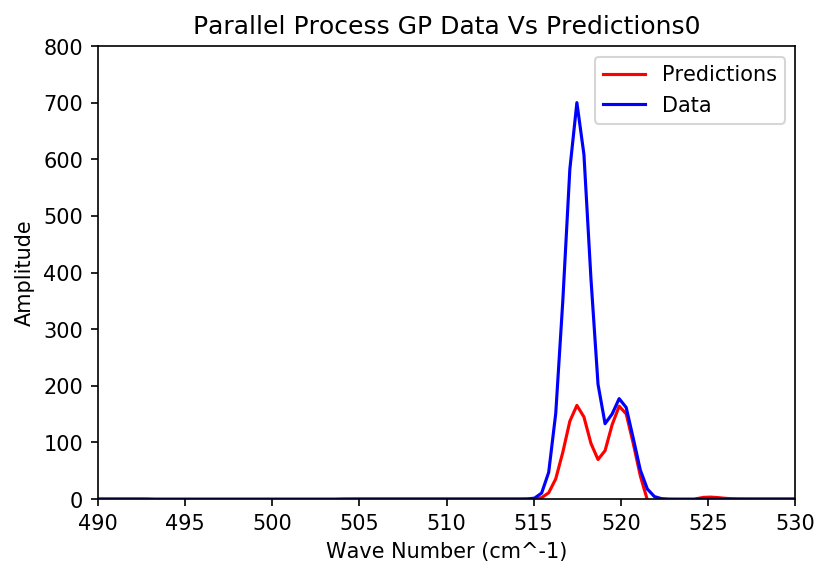

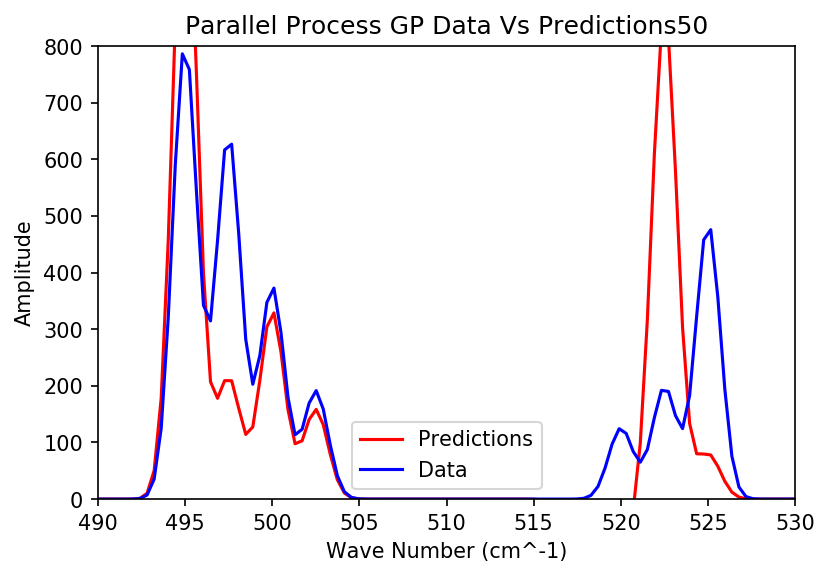

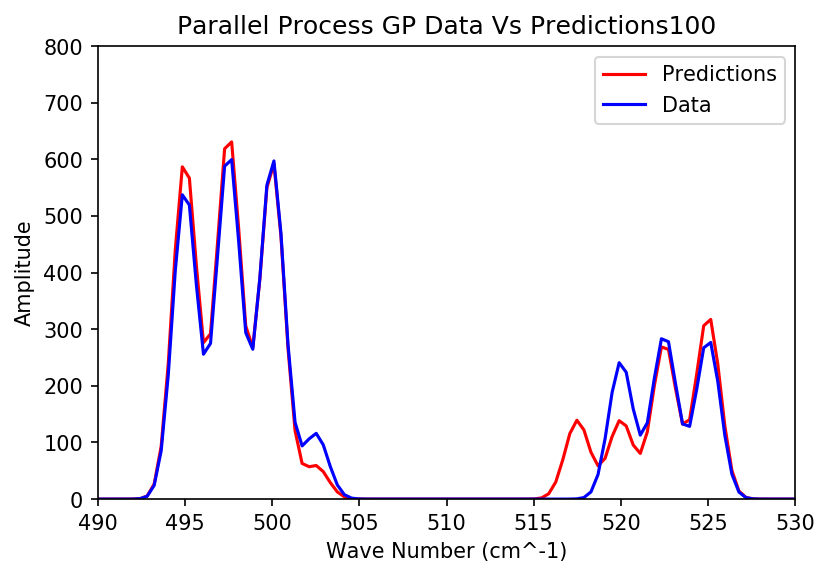

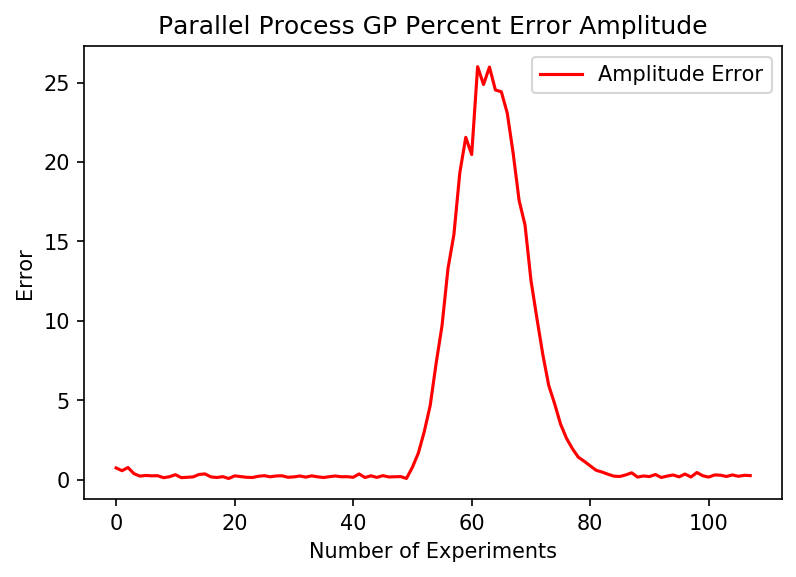

In [73]:
errorAmp_1 = np.zeros(len(Time))
errorPos_1 = np.zeros(len(Time))


x_plot = np.linspace(490,530,100)
y_plot = np.zeros(len(x_plot))

for i,T in enumerate (Time):
    
    Prediction_P = np.zeros(8)
    
    Prediction_P[0] = model1.predict([[T]])
    Prediction_P[1] = model2.predict([[T]])
    Prediction_P[2] = model3.predict([[T]])
    Prediction_P[3] = model4.predict([[T]])
    Prediction_P[4] = model5.predict([[T]])
    Prediction_P[5] = model6.predict([[T]])
    Prediction_P[6] = model7.predict([[T]])
    Prediction_P[7] = model8.predict([[T]])
    
    prediction_A = np.zeros(8)

    prediction_A[0] = modelA.predict([[T]])
    prediction_A[1] = modelB.predict([[T]])
    prediction_A[2] = modelC.predict([[T]])
    prediction_A[3] = modelD.predict([[T]])
    prediction_A[4] = modelF.predict([[T]])
    prediction_A[5] = modelF.predict([[T]])
    prediction_A[6] = modelG.predict([[T]])
    prediction_A[7] = modelH.predict([[T]])

    Position_D = list(df.loc[i,['pos 1','pos 2','pos 3','pos 4','pos 5','pos 6','pos 7','pos 8']])

    Ampl_D = list(df.loc[i,['ampl 1','ampl 2','ampl 3','ampl 4','ampl 5','ampl 6','ampl 7','ampl 8']])
    
    

    

#x_plot = np.linspace(515,530,100)

    def Gaussian (x, Position, Amplitude):
        return Amplitude*np.exp(-(x-Position)**2)

    
    #2 vectors of data

    errorAmp_1[i] = np.linalg.norm(Ampl_D - prediction_A)/np.linalg.norm(Ampl_D)
    errorPos_1[i] = np.linalg.norm(Position_D - Prediction_P)/np.linalg.norm(Position_D)
    
    # % plots every 50 points
    if i % 50 ==0:
    
        plt.figure()
        y_plot = np.zeros(len(x_plot))
        
        for j in range (8):
            y_plot=y_plot + Gaussian(x_plot,Prediction_P[j],prediction_A[j])

        plt.plot(x_plot, y_plot, label = 'Predictions')
        
        y_plot = np.zeros(len(x_plot))
        
        for j in range (8):
            y_plot=y_plot + Gaussian(x_plot,Position_D[j],Ampl_D[j])

        plt.plot(x_plot, y_plot, label = 'Data')
        plt.legend()
        plt.title('Parallel Process GP Data Vs Predictions' + str(i))
        plt.xlabel('Wave Number (cm^-1)')
        plt.ylabel('Amplitude')
        plt.xlim(490, 530)
        plt.ylim(0,800)
        
    
    
plt.figure()    
plt.plot(Time, errorAmp_1, label = 'Amplitude Error')
plt.title('Parallel Process GP Percent Error Amplitude')
plt.xlabel('Number of Experiments')
plt.ylabel('Error')
plt.legend()



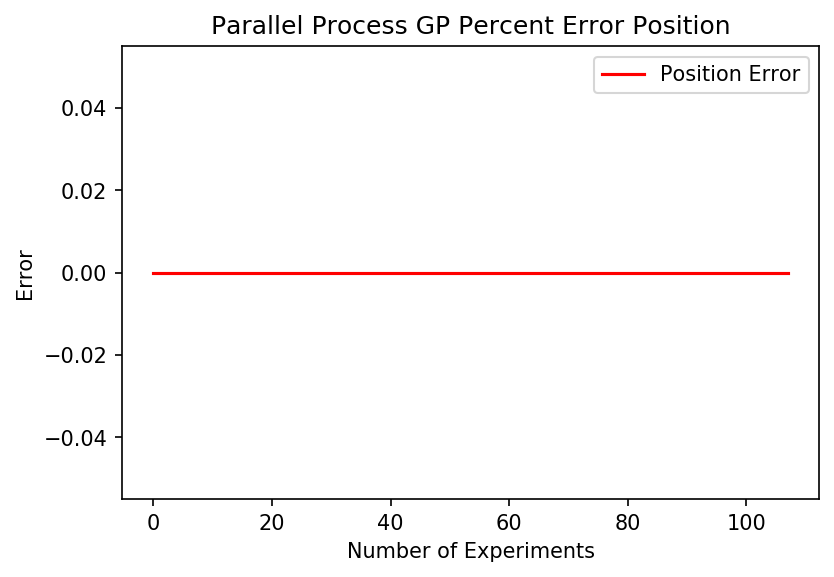

In [39]:
plt.plot(Time, errorPos_1, label = 'Position Error', color = 'r')
plt.title('Parallel Process GP Percent Error Position')
plt.xlabel('Number of Experiments')
plt.ylabel('Error')
plt.legend()

# Independent GP - All different Kernels

## Should I be using the hyper parameters that was produced from the initial guesses of the Partial Parallel Data??

### Position

In [41]:
#Kernel 1 - P1

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model 1

#Sigma_n = Covariance matrix
sigma_0 = 1   #Initial uncertainty 
sigma_W = .1 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernel1 = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,10))
model1P = GaussianProcessRegressor(kernel = kernel1, alpha = sigma_W**2, normalize_y = True)



model1P.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 1']])

#For optomization
print(model1P.kernel_)

0.00316**2 * RBF(length_scale=10)


In [42]:
# Kernel 1 - P2

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model 1

#Sigma_n = Covariance matrix
sigma_0 = 1   #Initial uncertainty 
sigma_W = .1 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernel2 = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,10))
model2P = GaussianProcessRegressor(kernel = kernel2, alpha = sigma_W**2, normalize_y = True)




model2P.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 2']])

           #For optomization
print(model2P.kernel_)

0.00316**2 * RBF(length_scale=10)


In [43]:
# Kernel 1 - P3

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model 1

#Sigma_n = Covariance matrix
sigma_0 = 1   #Initial uncertainty 
sigma_W = .1 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernel3 = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,10))
model3P = GaussianProcessRegressor(kernel = kernel3, alpha = sigma_W**2, normalize_y = True)




model3P.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 3']])

           #For optomization
print(model3P.kernel_)


0.00316**2 * RBF(length_scale=10)


In [44]:
# Kernel 1 - P4

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model 1

#Sigma_n = Covariance matrix
sigma_0 = 1   #Initial uncertainty 
sigma_W = .1 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernel4 = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,10))
model4P = GaussianProcessRegressor(kernel = kernel4, alpha = sigma_W**2, normalize_y = True)




model4P.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 4']])

           #For optomization
print(model4P.kernel_)


0.00316**2 * RBF(length_scale=10)


In [45]:
# Kernel 1 - P5

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model 1

#Sigma_n = Covariance matrix
sigma_0 = 1   #Initial uncertainty 
sigma_W = .1 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernel5 = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,10))
model5P = GaussianProcessRegressor(kernel = kernel5, alpha = sigma_W**2, normalize_y = True)




model5P.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 5']])

           #For optomization
print(model5P.kernel_)


0.00316**2 * RBF(length_scale=10)


In [46]:
# Kernel 1 - P6

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model 1

#Sigma_n = Covariance matrix
sigma_0 = 1   #Initial uncertainty 
sigma_W = .1 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernel6 = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,10))
model6P = GaussianProcessRegressor(kernel = kernel6, alpha = sigma_W**2, normalize_y = True)




model6P.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 6']])

           #For optomization
print(model6P.kernel_)


0.00316**2 * RBF(length_scale=10)


In [47]:
# Kernel 1 - P7

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model 1

#Sigma_n = Covariance matrix
sigma_0 = 1   #Initial uncertainty 
sigma_W = .1 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernel7 = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,10))
model7P = GaussianProcessRegressor(kernel = kernel7, alpha = sigma_W**2, normalize_y = True)




model7P.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 7']])

           #For optomization
print(model7P.kernel_)


0.00316**2 * RBF(length_scale=10)


In [48]:
# Kernel 1 - P8

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model 1

#Sigma_n = Covariance matrix
sigma_0 = 1   #Initial uncertainty 
sigma_W = .1 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernel8 = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,10))
model8P = GaussianProcessRegressor(kernel = kernel8, alpha = sigma_W**2, normalize_y = True)



model8P.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 8']])

           #For optomization
print(model8P.kernel_)


0.00316**2 * RBF(length_scale=10)


In [49]:
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor




model1P = GaussianProcessRegressor(kernel = kernel1, alpha = sigma_W**2, normalize_y = True, optimizer = None)
model2P = GaussianProcessRegressor(kernel = kernel2, alpha = sigma_W**2, normalize_y = True, optimizer = None)
model3P = GaussianProcessRegressor(kernel = kernel3, alpha = sigma_W**2, normalize_y = True, optimizer = None)
model4P = GaussianProcessRegressor(kernel = kernel4, alpha = sigma_W**2, normalize_y = True, optimizer = None)
model5P = GaussianProcessRegressor(kernel = kernel5, alpha = sigma_W**2, normalize_y = True, optimizer = None)
model6P = GaussianProcessRegressor(kernel = kernel6, alpha = sigma_W**2, normalize_y = True, optimizer = None)
model7P = GaussianProcessRegressor(kernel = kernel7, alpha = sigma_W**2, normalize_y = True, optimizer = None)
model8P = GaussianProcessRegressor(kernel = kernel8, alpha = sigma_W**2, normalize_y = True, optimizer = None)



model1P.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 1']])
model2P.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 2']])
model3P.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 3']])
model4P.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 4']])
model5P.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 5']])
model6P.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 6']])
model7P.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 7']])
model8P.fit(Time[0:50,np.newaxis], df.loc[0:49,['pos 8']])

# Predictions at time step 300 - 

prediction_P = np.zeros(8)
Error_P = np.zeros(8)

prediction_P[0], Error_P[0] = model1P.predict([[300]], return_std = True)
prediction_P[1], Error_P[1] = model2P.predict([[300]], return_std = True)
prediction_P[2], Error_P[2] = model3P.predict([[300]], return_std = True)
prediction_P[3], Error_P[3] = model4P.predict([[300]], return_std = True)
prediction_P[4], Error_P[4] = model5P.predict([[300]], return_std = True)
prediction_P[5], Error_P[5] = model6P.predict([[300]], return_std = True)
prediction_P[6], Error_P[6] = model7P.predict([[300]], return_std = True)
prediction_P[7], Error_P[7] = model8P.predict([[300]], return_std = True)


Data = np.zeros(8)

print(prediction_P)
print(Error_P)

           #For optomization
#print(modelY.kernel_)

[495.  497.5 500.  502.5 517.5 520.  522.5 525. ]
[1. 1. 1. 1. 1. 1. 1. 1.]


In [50]:
#Kernel 1 - A1

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model A

#Sigma_n = Covariance matrix
sigma_0 = 900   #Initial uncertainty 
sigma_W = 100 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernelA = sigma_0**2*RBF(length_scale, length_scale_bounds = (10,100))
modelAA = GaussianProcessRegressor(kernel = kernelA, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 1']]), normalize_y = True)



modelAA.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 1']])

#For optomization
print(modelAA.kernel_)

316**2 * RBF(length_scale=10)


In [51]:
#Kernel 1 - A2

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model B

#Sigma_n = Covariance matrix
sigma_0 = 1700   #Initial uncertainty 
sigma_W = 100 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernelB = sigma_0**2*RBF(length_scale, length_scale_bounds = (10,2000))
modelBA = GaussianProcessRegressor(kernel = kernelB, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 2']]), normalize_y = True)



modelBA.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 2']])

#For optomization
print(modelBA.kernel_)

316**2 * RBF(length_scale=10)


In [52]:
#Kernel 1 - A3

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model C

#Sigma_n = Covariance matrix
sigma_0 = 1100   #Initial uncertainty 
sigma_W = 100 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernelC = sigma_0**2*RBF(length_scale, length_scale_bounds = (10,1200))
modelCA = GaussianProcessRegressor(kernel = kernelC, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 3']]), normalize_y = True)



modelCA.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 3']])

#For optomization
print(modelCA.kernel_)

316**2 * RBF(length_scale=10)


In [53]:
#Kernel 1 - A4

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model D

#Sigma_n = Covariance matrix
sigma_0 = 400   #Initial uncertainty 
sigma_W = 100 #Initial noise variance 
length_scale = 1 #Initial length scale guess
f_0 = 0 # inital mean


kernelD = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,600))
modelDA = GaussianProcessRegressor(kernel = kernelD, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 4']]), normalize_y = True)



modelDA.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 4']])

#For optomization
print(modelDA.kernel_)

128**2 * RBF(length_scale=1)


In [54]:
#Kernel 1 - A5

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model E

#Sigma_n = Covariance matrix
sigma_0 = 700   #Initial uncertainty 
sigma_W = 100 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernelE = sigma_0**2*RBF(length_scale, length_scale_bounds = (10,1000))
modelEA = GaussianProcessRegressor(kernel = kernelE, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 5']]), normalize_y = True)



modelEA.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 5']])

#For optomization
print(modelEA.kernel_)

316**2 * RBF(length_scale=10)


In [55]:
#Kernel 1 - A6

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model F

#Sigma_n = Covariance matrix
sigma_0 = 500   #Initial uncertainty 
sigma_W = 100 #Initial noise variance 
length_scale = 10 #Initial length scale guess
f_0 = 0 # inital mean


kernelF = sigma_0**2*RBF(length_scale, length_scale_bounds = (10,600))
modelFA = GaussianProcessRegressor(kernel = kernelF, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 6']]), normalize_y = True)



modelFA.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 6']])

#For optomization
print(modelFA.kernel_)

316**2 * RBF(length_scale=10)


In [56]:
#Kernel 1 - A7

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model G

#Sigma_n = Covariance matrix
sigma_0 = 700   #Initial uncertainty 
sigma_W = 100 #Initial noise variance 
length_scale = 10 #Initial length scale guess



kernelG = sigma_0**2*RBF(length_scale, length_scale_bounds = (10,800))
modelGA = GaussianProcessRegressor(kernel = kernelG, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 7']]), normalize_y = True)



modelGA.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 7']])

#For optomization
print(modelGA.kernel_)

316**2 * RBF(length_scale=10)


In [57]:
#Kernel 1 - A8

import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor


#Model H

#Sigma_n = Covariance matrix
sigma_0 = 600   #Initial uncertainty 
sigma_W = 100 #Initial noise variance 
length_scale = 1 #Initial length scale guess



kernelH = sigma_0**2*RBF(length_scale, length_scale_bounds = (1,600))
modelHA = GaussianProcessRegressor(kernel = kernelH, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 8']]), normalize_y = True)



modelHA.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 8']])

#For optomization
print(modelHA.kernel_)

260**2 * RBF(length_scale=1)


In [58]:
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor





kernelA = sigma_0**2*RBF(length_scale, length_scale_bounds = (10, 990))
kernelB = sigma_0**2*RBF(length_scale, length_scale_bounds = (10, 2000))
kernelC = sigma_0**2*RBF(length_scale, length_scale_bounds = (10, 2000))
kernelD = sigma_0**2*RBF(length_scale, length_scale_bounds = (1, 1000))
kernelE = sigma_0**2*RBF(length_scale, length_scale_bounds = (10, 1000))
kernelF = sigma_0**2*RBF(length_scale, length_scale_bounds = (10, 500))
kernelG = sigma_0**2*RBF(length_scale, length_scale_bounds = (10, 1000))
kernelH = sigma_0**2*RBF(length_scale, length_scale_bounds = (1, 500))

modelAA = GaussianProcessRegressor(kernel = kernelA, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 1']]), normalize_y = True, optimizer = None)
modelBA = GaussianProcessRegressor(kernel = kernelB, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 2']]), normalize_y = True, optimizer = None)
modelCA = GaussianProcessRegressor(kernel = kernelC, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 3']]), normalize_y = True, optimizer = None)
modelDA = GaussianProcessRegressor(kernel = kernelD, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 4']]), normalize_y = True, optimizer = None)
modelEA = GaussianProcessRegressor(kernel = kernelE, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 5']]), normalize_y = True, optimizer = None)
modelFA = GaussianProcessRegressor(kernel = kernelF, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 6']]), normalize_y = True, optimizer = None)
modelGA = GaussianProcessRegressor(kernel = kernelG, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 7']]), normalize_y = True, optimizer = None)
modelHA = GaussianProcessRegressor(kernel = kernelH, alpha = (sigma_W**2)/np.var(df.loc[0:49,['ampl 8']]), normalize_y = True, optimizer = None)



modelAA.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 1']])
modelBA.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 2']])
modelCA.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 3']])
modelDA.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 4']])
modelEA.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 5']])
modelFA.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 6']])
modelGA.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 7']])
modelHA.fit(Time[0:50,np.newaxis], df.loc[0:49,['ampl 8']])

# Predictions at time step 300 - for Amplitude 

prediction_A = np.zeros(8)
error_A = np.zeros(8)

prediction_A[0], error_A[0] = modelAA.predict([[300]], return_std = True)
prediction_A[1], error_A[1] = modelBA.predict([[300]], return_std = True)
prediction_A[2], error_A[2] = modelCA.predict([[300]], return_std = True)
prediction_A[3], error_A[3] = modelDA.predict([[300]], return_std = True)
prediction_A[4], error_A[4] = modelEA.predict([[300]], return_std = True)
prediction_A[5], error_A[5] = modelFA.predict([[300]], return_std = True)
prediction_A[6], error_A[6] = modelGA.predict([[300]], return_std = True)
prediction_A[7], error_A[7] = modelHA.predict([[300]], return_std = True)


Data_A = np.zeros(8)

#Data_A
#Data_A[0] = ([[91]])
#Data_A[1] = modelB.predict([[91]])
#Data_A[2] = modelC.predict([[91]])
#Data_A[3] = modelD.predict([[91]])
#Data_A[4] = modelE.predict([[91]])
#Data_A[5] = modelF.predict([[91]])
#Data_A[6] = modelG.predict([[91]])
#Data_A[7] = modelH.predict([[91]])

print(prediction_A)
print(error_A)

           #For optomization
#print(modelY.kernel_)

[599.78846722 647.5453245  597.18735297  58.3144173   41.07957149
 139.12229281 276.30175236 324.39953669]
[600. 600. 600. 600. 600. 600. 600. 600.]


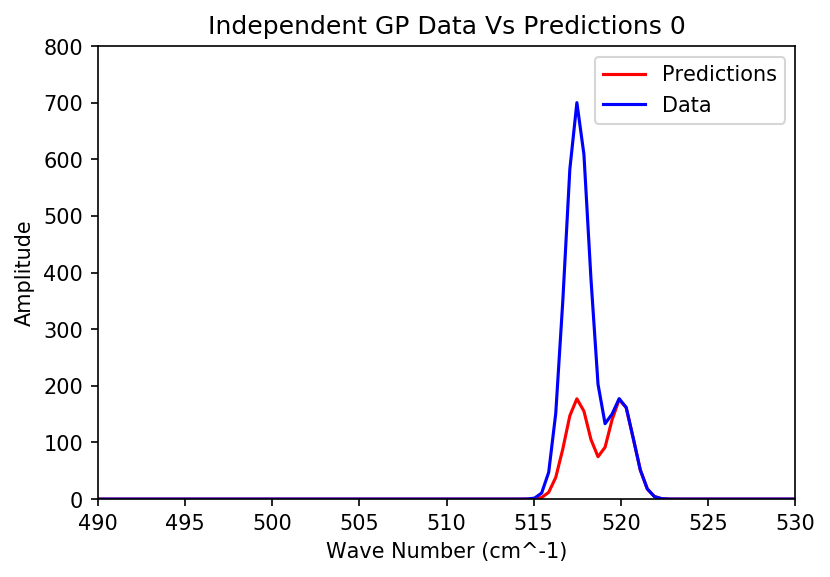

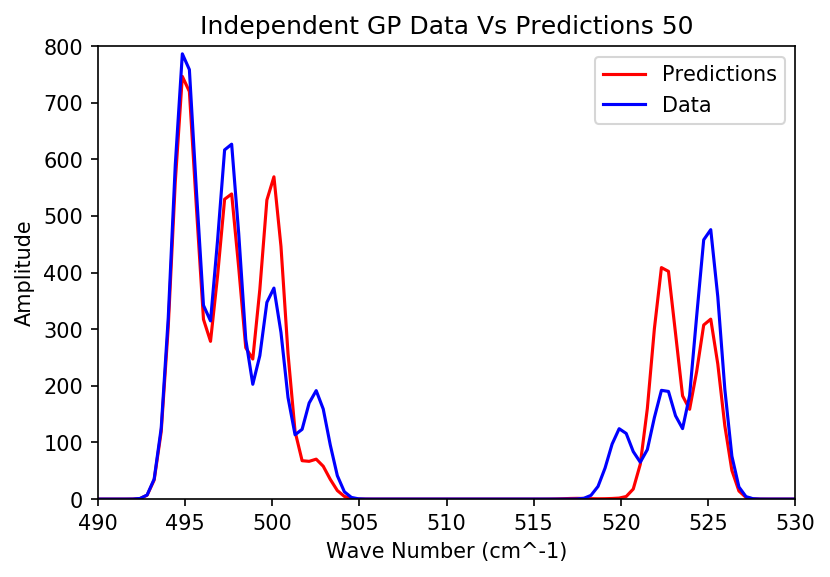

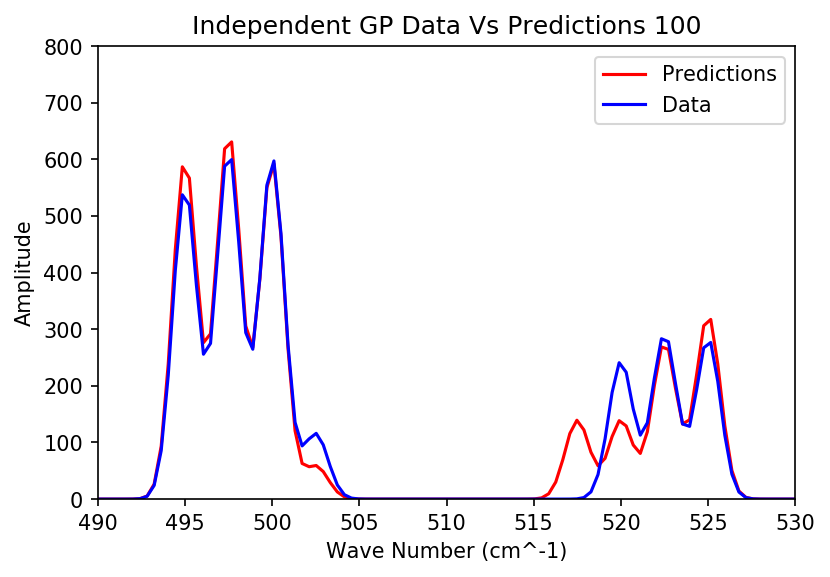

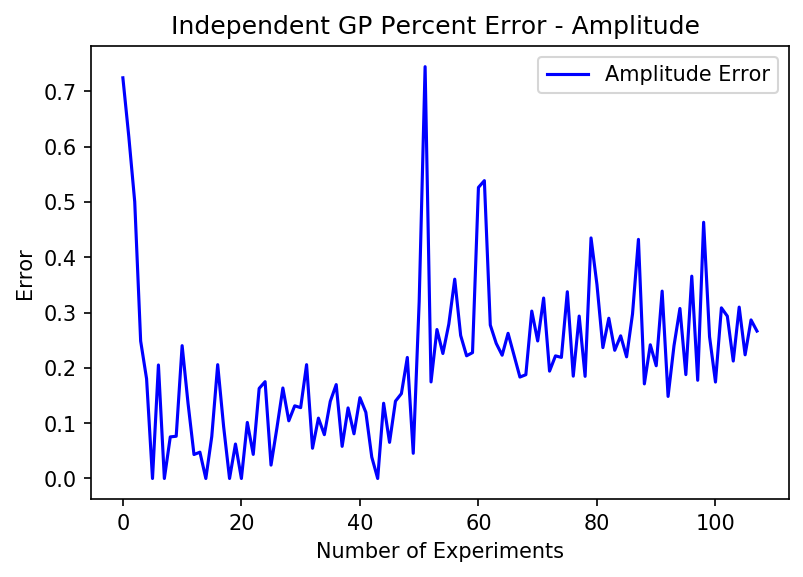

In [59]:
# Independent GP

errorAmp_2 = np.zeros(len(Time))
errorPos_2 = np.zeros(len(Time))

# X_plot = range of amplitude values
x_plot = np.linspace(490,530,100)
y_plot = np.zeros(len(x_plot))

for i,T in enumerate (Time):
    
    Prediction_P = np.zeros(8)
    
    Prediction_P[0] = model1P.predict([[T]])
    Prediction_P[1] = model2P.predict([[T]])
    Prediction_P[2] = model3P.predict([[T]])
    Prediction_P[3] = model4P.predict([[T]])
    Prediction_P[4] = model5P.predict([[T]])
    Prediction_P[5] = model6P.predict([[T]])
    Prediction_P[6] = model7P.predict([[T]])
    Prediction_P[7] = model8P.predict([[T]])
    
    prediction_A = np.zeros(8)

    prediction_A[0] = modelAA.predict([[T]])
    prediction_A[1] = modelBA.predict([[T]])
    prediction_A[2] = modelCA.predict([[T]])
    prediction_A[3] = modelDA.predict([[T]])
    prediction_A[4] = modelFA.predict([[T]])
    prediction_A[5] = modelFA.predict([[T]])
    prediction_A[6] = modelGA.predict([[T]])
    prediction_A[7] = modelHA.predict([[T]])

    Position_D = list(df.loc[i,['pos 1','pos 2','pos 3','pos 4','pos 5','pos 6','pos 7','pos 8']])

    Ampl_D = list(df.loc[i,['ampl 1','ampl 2','ampl 3','ampl 4','ampl 5','ampl 6','ampl 7','ampl 8']])
    
    

    

#x_plot = np.linspace(515,530,100)

    def Gaussian (x, Position, Amplitude):
        return Amplitude*np.exp(-(x-Position)**2)

    
    #2 vectors of data

    errorAmp_2[i] = np.linalg.norm(Ampl_D - prediction_A)/np.linalg.norm(Ampl_D)
    errorPos_2[i] = np.linalg.norm(Position_D - Prediction_P)/np.linalg.norm(Position_D)
    
    # % plots every 50 points
    if i % 50 ==0:
    
        plt.figure()
        y_plot = np.zeros(len(x_plot))
        
        for j in range (8):
            y_plot=y_plot + Gaussian(x_plot,Prediction_P[j],prediction_A[j])

        plt.plot(x_plot, y_plot, label = 'Predictions')
        
        y_plot = np.zeros(len(x_plot))
        
        for j in range (8):
            y_plot=y_plot + Gaussian(x_plot,Position_D[j],Ampl_D[j])

        plt.plot(x_plot, y_plot, label = 'Data')
        plt.legend()
        plt.title('Independent GP Data Vs Predictions '+ str(i))
        plt.xlabel('Wave Number (cm^-1)')
        plt.ylabel('Amplitude')
        plt.xlim(490, 530)
        plt.ylim(0,800)
    
    
plt.figure()    
plt.plot(Time, errorAmp_2, label = 'Amplitude Error', color='b')
plt.title('Independent GP Percent Error - Amplitude ')
plt.xlabel('Number of Experiments')
plt.ylabel('Error')
plt.legend()



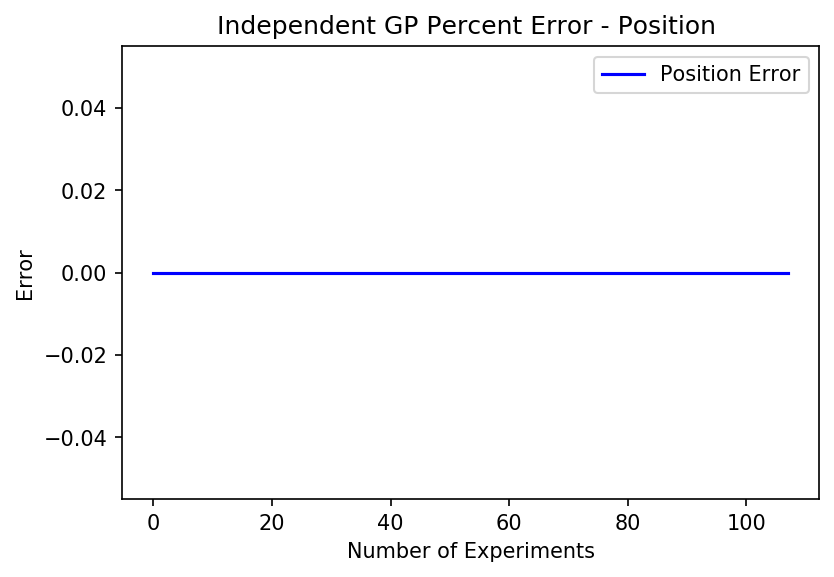

In [475]:
plt.plot(Time, errorPos_2, label = 'Position Error', color= 'b')
plt.title('Independent GP Percent Error - Position ')
plt.xlabel('Number of Experiments')
plt.ylabel('Error')
plt.legend()

## I split the features into individual independent GPs because the values within the Peak position column and the amplitude are vastly different. The amplitude values as a function of time are typically higher values than the same times given wave number. there is also more variation within the amplitude column so I wanted to compare the individual hyper parameter values for the given columns and note the difference. In addition at the end I took the mean of the hyper parameters for both features and put them together to get one overall uncertainty and length scale to see how well predictions can be made when given time for a 2 vector parallel process.